# Problem Statement:

In [1]:
#The problem statement is to build a predictive model to determine the sales of each product at a particular store.
#The aim is to understand the key properties of products and stores that influence sales.


# Hypothesis Generation:

In [2]:
#Before diving into the data, it's helpful to generate some hypotheses about factors that may impact sales. 
#These can be based on domain knowledge or assumptions. For example, you might hypothesize that the location of the store,
#the type of product, and promotional offers could influence sales.

# Loading packages and data

In [3]:
# Importing pandas for data manipulation
import pandas as pd

# Importing numpy for numerical operations
import numpy as np


# Importing matplotlib for data visualization
import matplotlib.pyplot as plt

# Importing seaborn for advanced data visualization
import seaborn as sns

In [4]:
# Loading the test dataset from a CSV file
test = pd.read_csv(r'C:\Users\vijay\OneDrive\Documents\technocolabs\Test.csv')

# Loading the train dataset from a CSV file
train = pd.read_csv(r'C:\Users\vijay\OneDrive\Documents\technocolabs\Train.csv')

# Data Structure and Content:

In [5]:
#view the head of test dataset
test.head() 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
#view the head of train dataset
train.head() 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
#check the shape of both test and train datasets
train.shape, test.shape

((8523, 12), (5681, 11))

In [8]:
#View the columns in both dataset
test.columns, train.columns

(Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales'],
       dtype='object'))

In [9]:
train.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Exploratory Data Analysis

In [13]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
##Missing value treatmet
# Fill null values in 'Item_Weight' column with the median value of the column of test dataset
test['Item_Weight'].fillna(test['Item_Weight'].median(), inplace=True)
# Fill null values in outlet_size' column with the mode value of the column of the test dataset 
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)                                        

In [16]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [17]:
# Fill null values in 'Item_Weight' column with the median value of the column of train dataset
train['Item_Weight'].fillna(train['Item_Weight'].median(),inplace=True)
# Fill null values in 'Outlet_Size' column with the median value of the column of train dataset
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)

In [18]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [20]:
test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [21]:
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [22]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [23]:
test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [24]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [25]:
test.Item_Identifier.value_counts()

DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [26]:
train.Item_Identifier.value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [27]:
test.Item_Type.value_counts()  

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [28]:
train.Item_Type.value_counts()  

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [29]:
test.Outlet_Identifier.value_counts()

OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [30]:
train.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [31]:
test.Outlet_Size.value_counts()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [32]:
train.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [33]:
test.Outlet_Location_Type.value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [34]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [35]:
test.Outlet_Type.value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [36]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Item_Weight'>

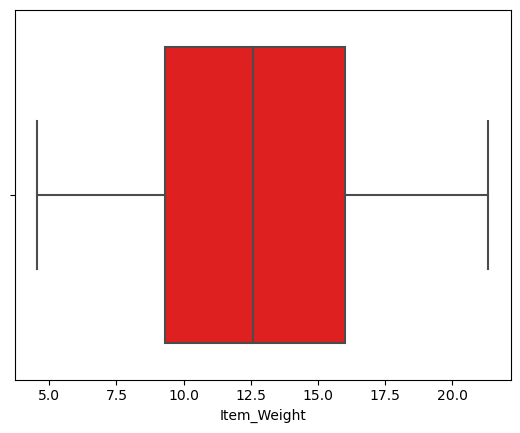

In [37]:
sns.boxplot(data=train,x='Item_Weight',color='red')

<AxesSubplot:xlabel='Item_Visibility'>

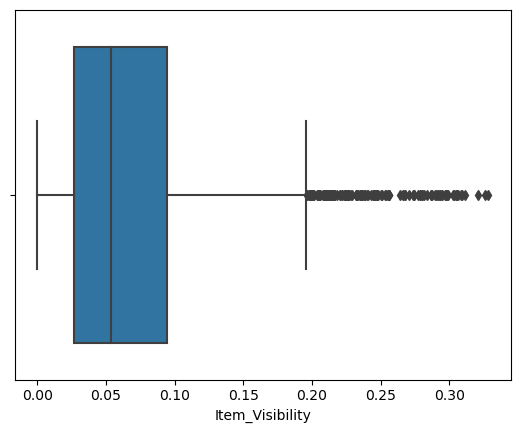

In [38]:
sns.boxplot(data=train,x='Item_Visibility')

In [39]:
from scipy.stats.mstats import winsorize

In [40]:
train['Item_Visibility']=winsorize(train['Item_Visibility'],limits=(0.05,0.05))

<AxesSubplot:xlabel='Item_MRP'>

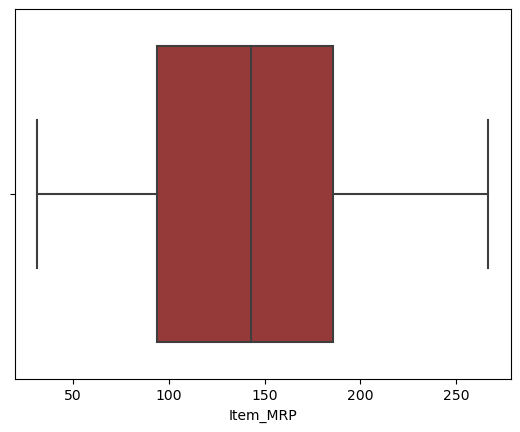

In [41]:
sns.boxplot(data=train,x='Item_MRP',color='brown')

<AxesSubplot:xlabel='Item_Outlet_Sales'>

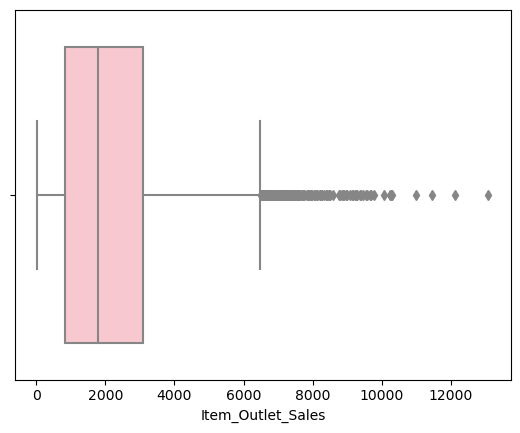

In [42]:
sns.boxplot(data=train,x='Item_Outlet_Sales',color='pink')

In [43]:
train['Item_Outlet_Sales']=winsorize(train['Item_Outlet_Sales'],limits=(0.05,0.05))

<AxesSubplot:xlabel='Item_Outlet_Sales'>

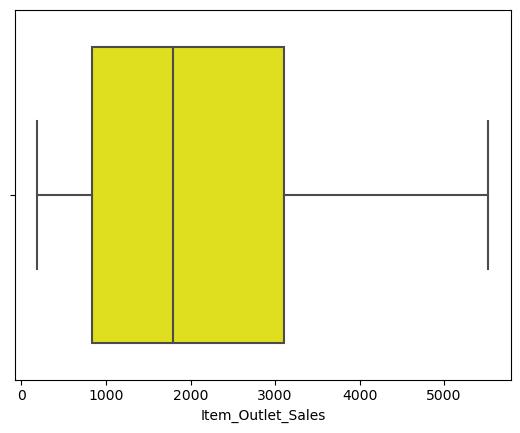

In [44]:
sns.boxplot(data=train,x='Item_Outlet_Sales',color='yellow')

In [45]:
train.shape,test.shape

((8523, 12), (5681, 11))

# Categorical Variable

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

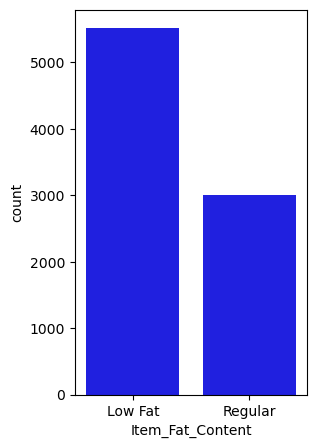

In [46]:
plt.figure(figsize=(3,5))
sns.countplot(data=train,x='Item_Fat_Content',color='blue')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

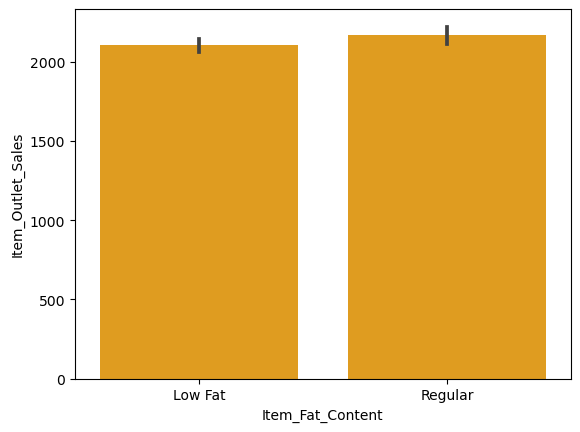

In [47]:
sns.barplot(data=train,x='Item_Fat_Content',y='Item_Outlet_Sales',color='orange')

# conclusion:-
    Items fat content Low Fat and Regular then Selling of regular Items is more than low fat Items 
    

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

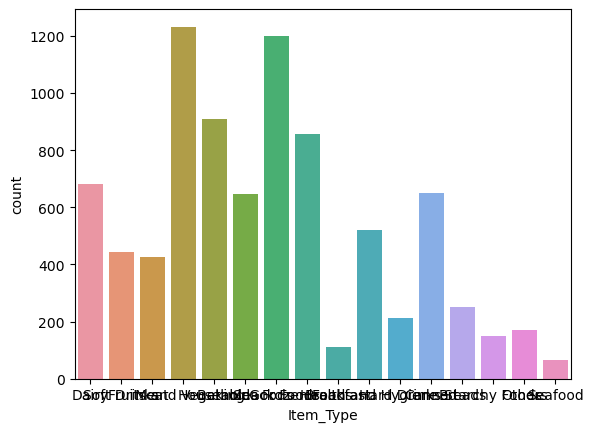

In [48]:
sns.countplot(data=train,x='Item_Type')

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

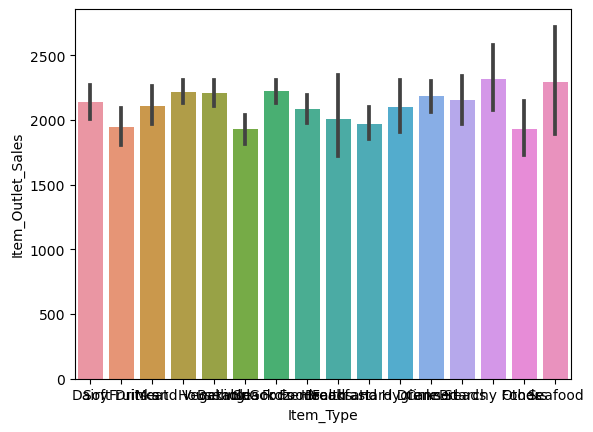

In [49]:
sns.barplot(data=train,x='Item_Type',y='Item_Outlet_Sales')

# Conclusion:-
   From above we conclude that Selling of seafood is more

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

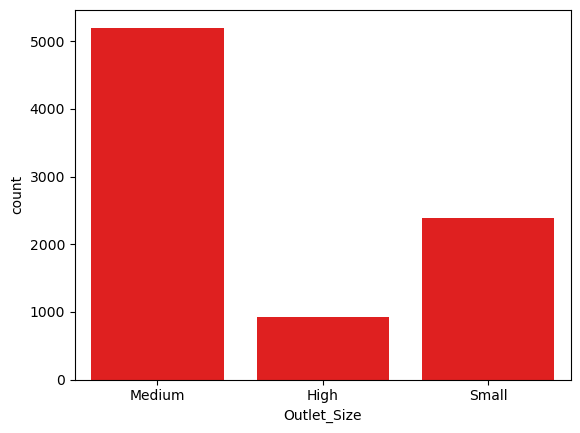

In [50]:
sns.countplot(data=train,x='Outlet_Size',color='red')

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

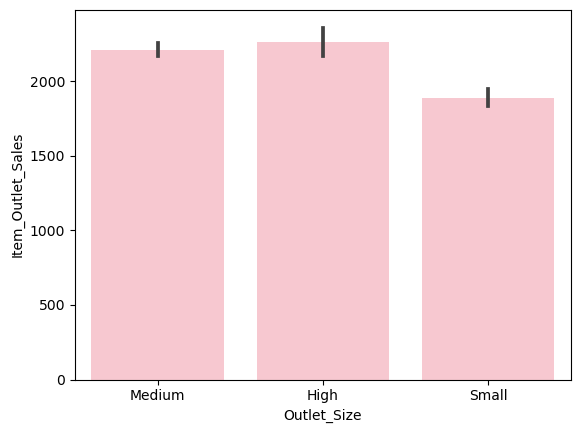

In [51]:
sns.barplot(data=train,x='Outlet_Size',y='Item_Outlet_Sales',color='pink')

# conclusion:-
    if outlets size is high then selling of products is more.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

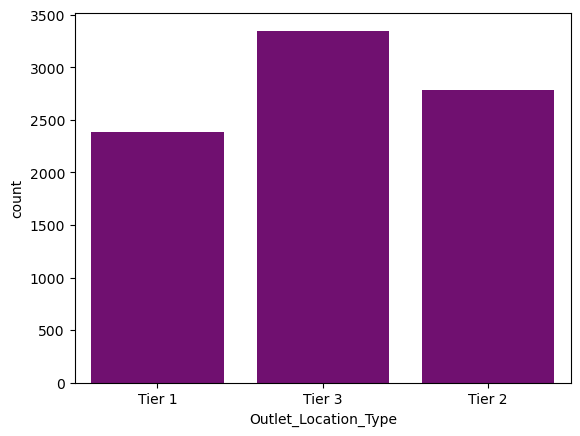

In [52]:
sns.countplot(data=train,x='Outlet_Location_Type',color='purple')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

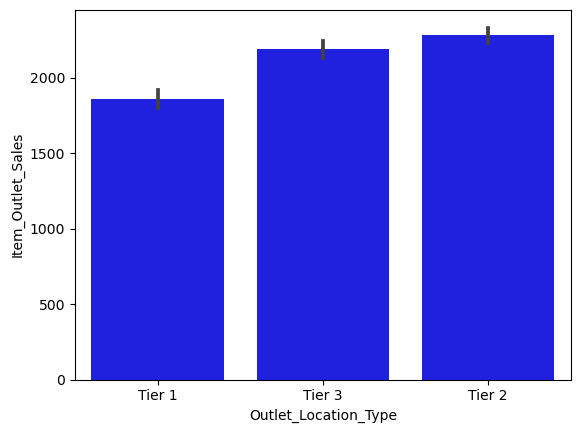

In [53]:
sns.barplot(data=train,x='Outlet_Location_Type',y='Item_Outlet_Sales',color='blue')

# Conclusion:-
    selling of products is more whose Outlet location is tier 3.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

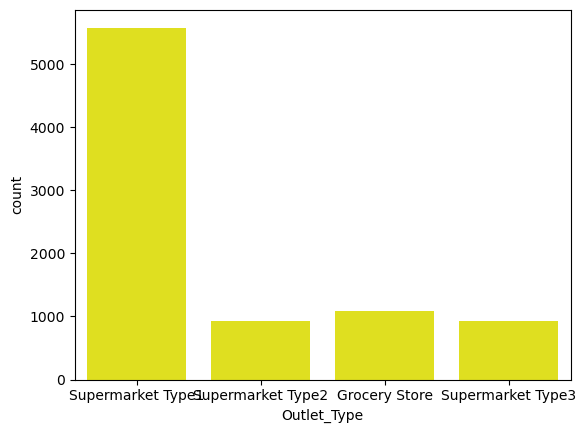

In [54]:
sns.countplot(data=train,x='Outlet_Type',color='yellow')

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

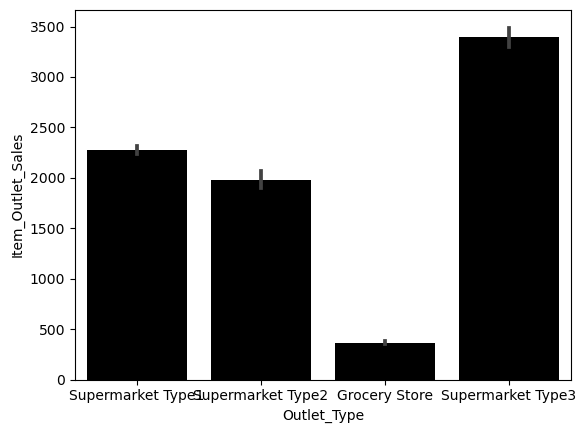

In [55]:
sns.barplot(data=train,x='Outlet_Type',y='Item_Outlet_Sales',color='black')

# conclusion:-
    Selling of product is more whose Outlet type is Supermarket type 3.

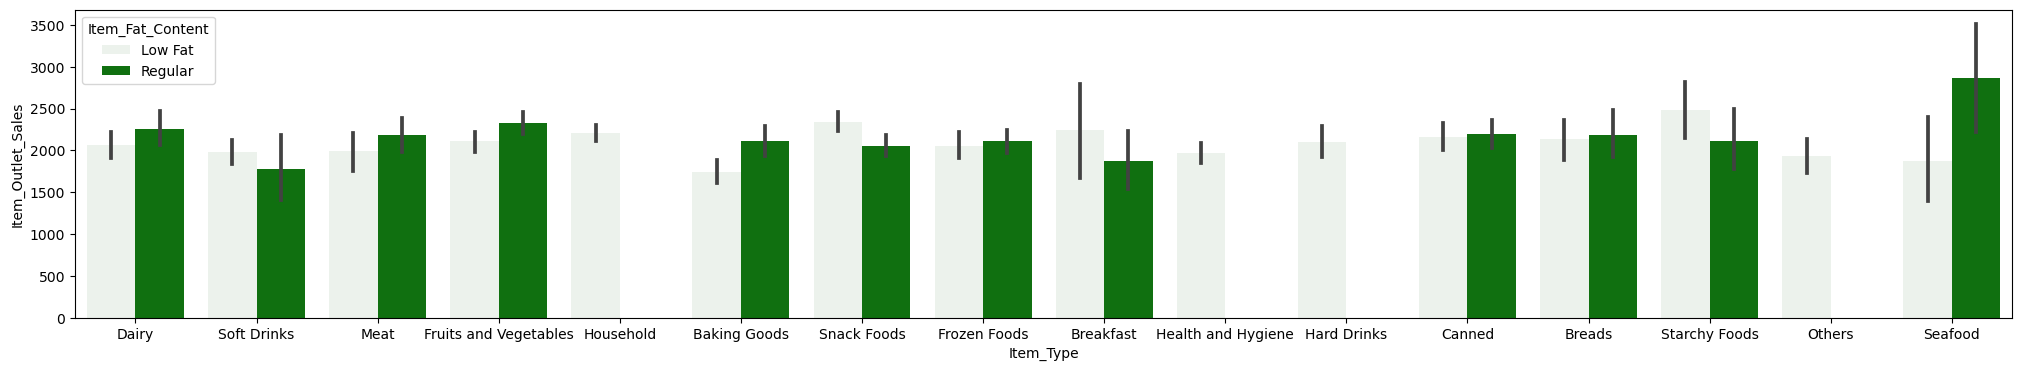

In [56]:
plt.figure(figsize=(25,4))
sns.barplot(data=train,x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',color='green')
plt.show()

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

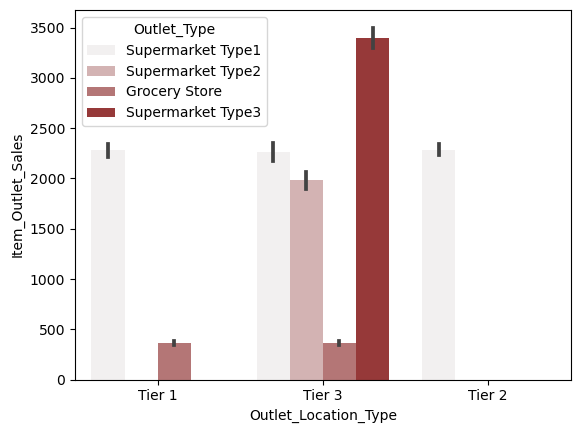

In [57]:

sns.barplot(data=train,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Type',color='brown')


# Numerical Variable

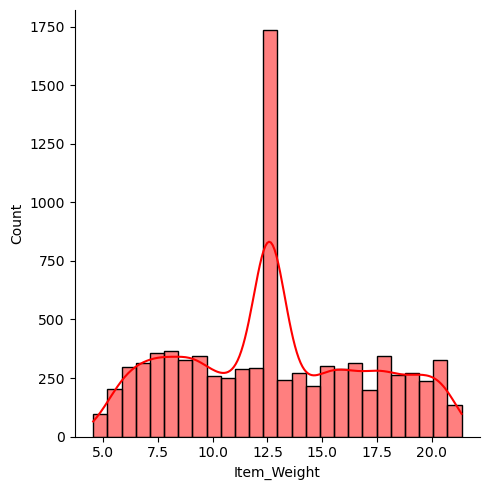

In [58]:
sns.displot(data=train,x='Item_Weight',color='red',kde=True)


<AxesSubplot:xlabel='Item_Weight'>

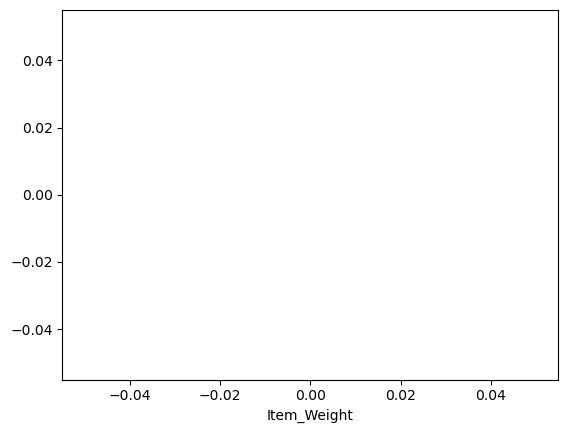

In [59]:
sns.scatterplot(data=train,x='Item_Weight',color='pink')

In [60]:
train['Item_Visibility'].mean()

0.06435454226011966

In [61]:
train['Item_Visibility'].mode()

0    0.0
Name: Item_Visibility, dtype: float64

In [62]:
train['Item_Visibility'].median()

0.053930934

In [63]:
train['Item_Visibility'].min()

0.0

In [64]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].median())
test['Item_Visibility']=test['Item_Visibility'].replace(0,test['Item_Visibility'].median())

In [65]:
train['Item_Visibility'].min()

0.003574698

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

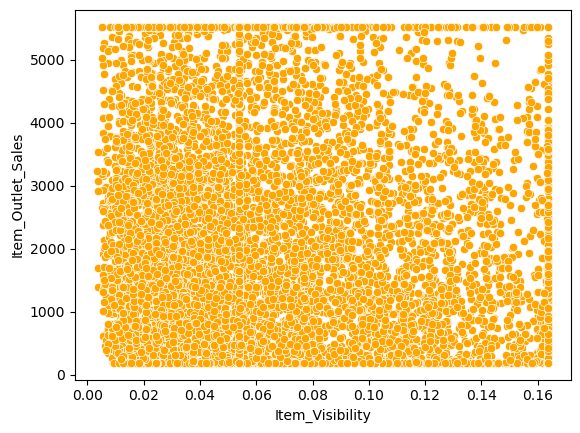

In [66]:
sns.scatterplot(data=train,x='Item_Visibility',y='Item_Outlet_Sales',color='orange')

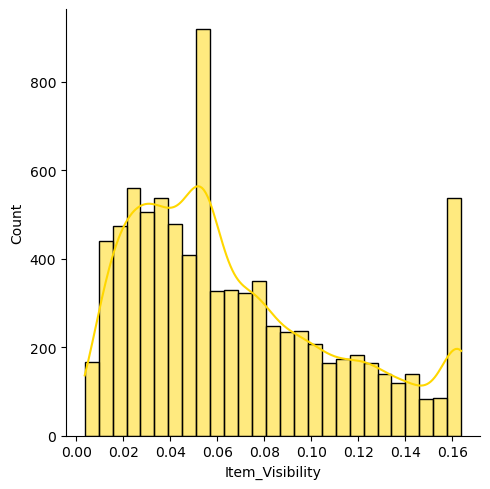

In [67]:
sns.displot(data=train,x='Item_Visibility',color='gold',kde=True)

# Conclusion:-
    Sales is more having Item Visibility is from 0 to 0.08
    

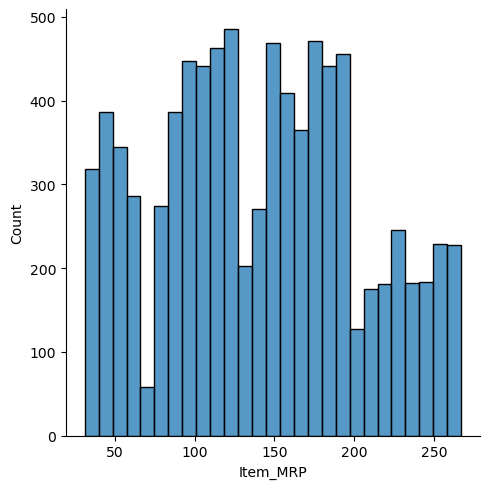

In [68]:
sns.displot(data=train,x='Item_MRP')

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

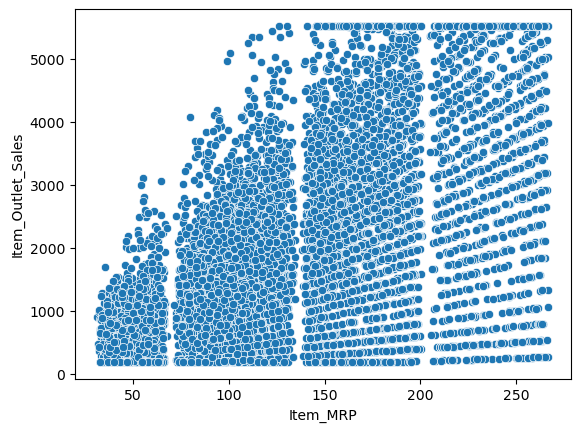

In [69]:
sns.scatterplot(data=train,x='Item_MRP',y='Item_Outlet_Sales')

# Conclusion:-
    Sales of product is more whose MRP is between 200-250

In [70]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x:2023-x)
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x:2023-x)

<AxesSubplot:xlabel='Years_Established', ylabel='count'>

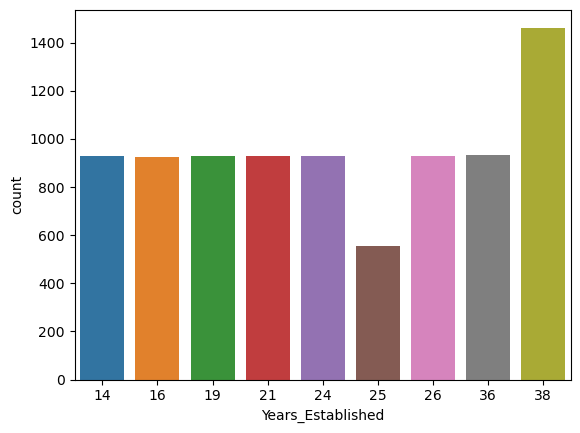

In [71]:
sns.countplot(data=train,x='Years_Established')

<AxesSubplot:xlabel='Years_Established', ylabel='Item_Outlet_Sales'>

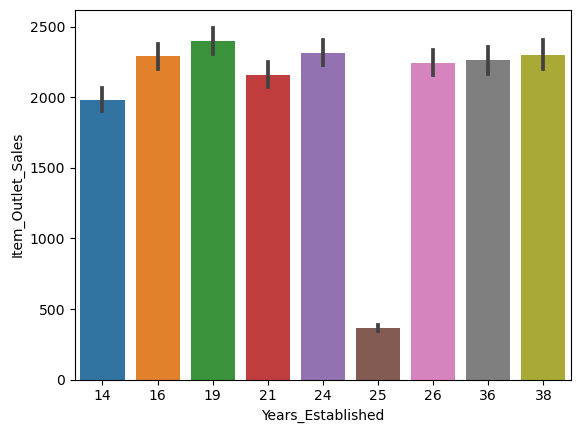

In [72]:
sns.barplot(data=train,x='Years_Established',y='Item_Outlet_Sales')

# Conclusion:-
    Before 25 years Items_Outlet_Sales has lowest Sales.

In [73]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36


In [74]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Years_Established
Item_Weight,1.000000,-0.017850,0.024951,0.007739,0.011589,-0.007739
Item_Visibility,-0.017850,1.000000,-0.003915,-0.059374,-0.117150,0.059374
Item_MRP,0.024951,-0.003915,1.000000,0.005020,0.576092,-0.005020
Outlet_Establishment_Year,0.007739,-0.059374,0.005020,1.000000,-0.028509,-1.000000
Item_Outlet_Sales,0.011589,-0.117150,0.576092,-0.028509,1.000000,0.028509
Years_Established,-0.007739,0.059374,-0.005020,-1.000000,0.028509,1.000000


In [75]:
# Select all columns in "train" that have a data type of "object"
categorical = train.select_dtypes(include =[object])
print(categorical)

     Item_Identifier Item_Fat_Content              Item_Type  \
0              FDA15          Low Fat                  Dairy   
1              DRC01          Regular            Soft Drinks   
2              FDN15          Low Fat                   Meat   
3              FDX07          Regular  Fruits and Vegetables   
4              NCD19          Low Fat              Household   
...              ...              ...                    ...   
8518           FDF22          Low Fat            Snack Foods   
8519           FDS36          Regular           Baking Goods   
8520           NCJ29          Low Fat     Health and Hygiene   
8521           FDN46          Regular            Snack Foods   
8522           DRG01          Low Fat            Soft Drinks   

     Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
0               OUT049      Medium               Tier 1  Supermarket Type1  
1               OUT018      Medium               Tier 3  Supermarket Type2  


# Data preprocessing

In [76]:
train.Item_Visibility.describe()

count    8523.000000
mean        0.067683
std         0.043731
min         0.003575
25%         0.033085
50%         0.053931
75%         0.094585
max         0.163806
Name: Item_Visibility, dtype: float64

In [77]:
train.Item_Visibility = train.Item_Visibility.apply(np.log1p)

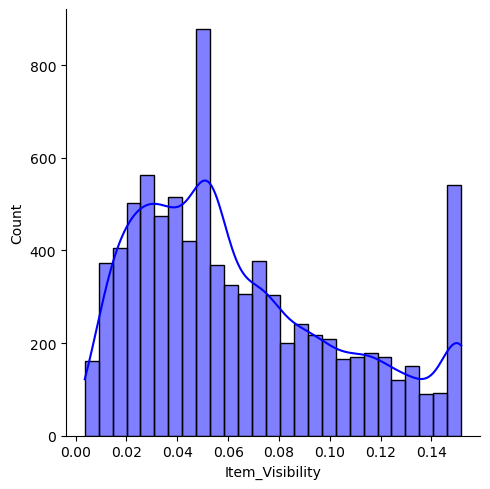

In [78]:
sns.displot(x=train.Item_Visibility, color='blue', kde=True)
plt.show()

In [79]:
train.Item_Visibility.describe()

count    8523.000000
mean        0.064668
std         0.040395
min         0.003568
25%         0.032550
50%         0.052527
75%         0.090376
max         0.151695
Name: Item_Visibility, dtype: float64

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Encode categorical variables in the training dataset
for i in categorical.columns:
    train[i] = le.fit_transform(train[i])
    
# Encode categorical variables in the testing dataset
for i in categorical.columns:
    test[i] = le.fit_transform(test[i])


In [81]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,156,9.30,0,0.015920,4,249.8092,9,1999,1,0,1,3735.1380,24
1,8,5.92,1,0.019095,14,48.2692,3,2009,1,2,2,443.4228,14
2,662,17.50,0,0.016621,10,141.6180,9,1999,1,0,1,2097.2700,24
3,1121,19.20,1,0.052527,6,182.0950,0,1998,1,2,0,732.3800,25
4,1297,8.93,0,0.052527,9,53.8614,1,1987,0,2,1,994.7052,36


In [82]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1,24
1,1067,8.300,1,0.038428,4,87.3198,2,2007,1,1,1,16
2,1406,14.600,0,0.099575,11,241.7538,0,1998,1,2,0,25
3,809,7.315,0,0.015388,13,155.0340,2,2007,1,1,1,16
4,1184,12.500,1,0.118599,4,234.2300,5,1985,1,2,3,38


In [88]:
X = train.drop('Item_Outlet_Sales',axis=1)
Y = train['Item_Outlet_Sales']

X.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,156,9.30,0,0.015920,4,249.8092,9,1999,1,0,1,24
1,8,5.92,1,0.019095,14,48.2692,3,2009,1,2,2,14


In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12, svd_solver="full")
X = pd.DataFrame(pca.fit_transform(X), columns=X.columns)
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,623.517742,109.938109,-1.403125,-4.973438,0.356805,-4.253765,0.186484,0.697605,-0.492705,0.200051,-0.041349,7.168936e-14
1,771.891248,-91.301514,-15.564934,-0.312642,-9.372169,2.306385,-1.081283,-0.189907,0.656843,0.031712,-0.041570,7.171090e-14
2,117.712809,0.855384,-1.725165,5.336039,1.041064,-4.370174,0.178274,0.684250,-0.310394,0.194199,-0.036548,5.888020e-14
3,-341.362131,40.489415,-0.236935,3.812078,5.088695,4.744622,1.017231,0.016459,0.672593,-0.516980,-0.029318,7.891400e-14
4,-517.129374,-88.089419,15.148709,-1.507159,-4.121648,3.605517,0.028123,0.695485,-0.251291,-0.011869,-0.013146,6.669341e-14


In [90]:
from sklearn.preprocessing import PowerTransformer
powert = PowerTransformer(method = 'yeo-johnson')
X = pd.DataFrame(powert.fit_transform(X), columns=X.columns)
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,1.384614,1.727837,0.079177,-1.165607,0.077353,-1.512520,0.144701,1.354990,-1.345103,0.703966,-1.149067,2.064078
1,1.712486,-1.494997,-1.534194,-0.069202,-2.230631,0.806691,-1.138759,-0.259348,1.327462,0.102837,-1.157336,2.064078
2,0.265990,0.042807,0.047949,1.246148,0.242892,-1.556706,0.135602,1.337204,-0.566422,0.682952,-0.973081,-4.779809
3,-0.759056,0.660927,0.187006,0.892202,1.229982,1.575702,1.115924,0.222325,1.341905,-1.809166,-0.720583,5.841457
4,-1.153038,-1.440849,1.209433,-0.349485,-0.991074,1.219468,-0.028710,1.352175,-0.352239,-0.051605,-0.207083,-0.653963


In [91]:
X.skew().sort_values()

Item_MRP                     -0.025991
Item_Visibility              -0.007591
Item_Identifier               0.000167
Item_Type                     0.010836
Item_Fat_Content              0.011212
Outlet_Location_Type          0.030461
Item_Weight                   0.058794
Outlet_Type                   0.098731
Outlet_Establishment_Year     0.132853
Outlet_Identifier             0.136235
Outlet_Size                   0.354622
Years_Established            43.245034
dtype: float64

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,1.384614,1.727837,0.079177,-1.165607,0.077353,-1.512520,0.144701,1.354990,-1.345103,0.703966,-1.149067,2.064078
1,1.712486,-1.494997,-1.534194,-0.069202,-2.230631,0.806691,-1.138759,-0.259348,1.327462,0.102837,-1.157336,2.064078
2,0.265990,0.042807,0.047949,1.246148,0.242892,-1.556706,0.135602,1.337204,-0.566422,0.682952,-0.973081,-4.779809
3,-0.759056,0.660927,0.187006,0.892202,1.229982,1.575702,1.115924,0.222325,1.341905,-1.809166,-0.720583,5.841457
4,-1.153038,-1.440849,1.209433,-0.349485,-0.991074,1.219468,-0.028710,1.352175,-0.352239,-0.051605,-0.207083,-0.653963


In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif=pd.DataFrame()
    vif['variables']=X.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

calc_vif(X)

,variables,VIF FACTOR
0,Item_Identifier,1.005398
1,Item_Weight,1.000019
2,Item_Fat_Content,1.022913
3,Item_Visibility,1.001856
4,Item_Type,1.001025
5,Item_MRP,1.008580
6,Outlet_Identifier,1.018326
7,Outlet_Establishment_Year,1.008075
8,Outlet_Size,1.008288
9,Outlet_Location_Type,1.004265


# Linear Regression

In [106]:
from sklearn.model_selection import train_test_split

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

max_Accu=0
max_RS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>max_Accu:
        max_Accu=r2
        max_RS=i

print("Best r2 score is", max_Accu,"on Random State", max_RS)

Best r2 score is 0.5717281941197869 on Random State 451


,Importance
Features,
Item_Weight,0.383
Outlet_Identifier,0.289
Item_Fat_Content,0.049
Outlet_Type,0.040
Outlet_Size,0.034
Item_Visibility,0.033
Item_Type,0.031
Outlet_Location_Type,0.031
Item_Identifier,0.030


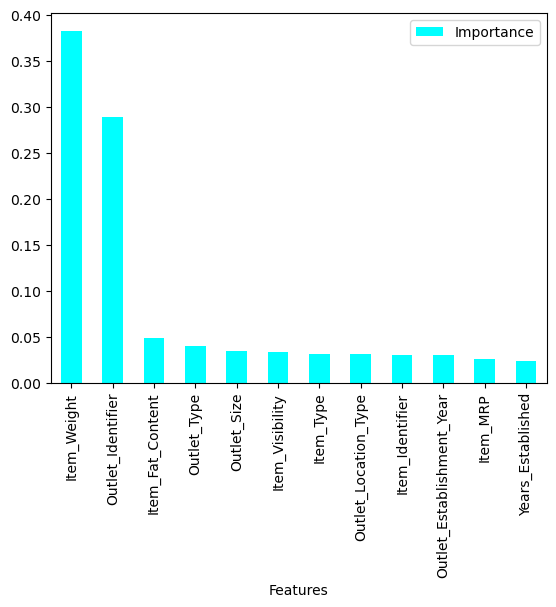

In [110]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='cyan')
importances

In [111]:
X.shape, y.shape

((8523, 12), (8523,))

In [112]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((6818, 12), (1705, 12), (1705,), (6818,))

In [113]:
import statsmodels.api as sm

In [114]:
import statsmodels.api as sm

# Create a linear regression model and fit it to the data
Lr_model = sm.OLS(y_train, X_train)
results = Lr_model.fit()

# Print the regression coefficients and other statistics
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.180
Model:                            OLS   Adj. R-squared (uncentered):              0.179
Method:                 Least Squares   F-statistic:                              124.6
Date:                Tue, 20 Jun 2023   Prob (F-statistic):                   2.00e-282
Time:                        12:14:13   Log-Likelihood:                         -62657.
No. Observations:                6818   AIC:                                  1.253e+05
Df Residuals:                    6806   BIC:                                  1.254e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

# Lasso Regression

In [115]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# create a Lasso model and fit it to the training data
lasso_model = Lasso(alpha=0.1) # set the regularization strength
lasso_model.fit(X_train, y_train)

# make predictions on the test data
y_pred = lasso_model.predict(X_test)

# calculate the mean squared error and R-squared for the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the model coefficients and other statistics
print("Lasso Regression Report\n")
print("Model coefficients:")
print(lasso_model.coef_)
print("\nModel intercept:")
print(lasso_model.intercept_)
print("\nModel performance:")
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Lasso Regression Report

Model coefficients:
[  -8.80848613  883.35016012   78.56749739  -10.36951744    8.54925446
 -236.65756174 -615.47904526  -12.829661     28.6248054   182.16731636
  -49.34712721    5.75877555]

Model intercept:
2126.791688601776

Model performance:
Mean squared error: 1159869.57
R-squared: 0.53


In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# create a Random Forest model and fit it to the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=100)
rf_model.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf_model.predict(X_test)

# calculate the mean squared error and R-squared for the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the model feature importances and other statistics
print("Random Forest Regression Report\n")
print("Feature importances:")
print(rf_model.feature_importances_)
print("\nModel performance:")
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Random Forest Regression Report

Feature importances:
[0.03001392 0.3836432  0.04888644 0.03397621 0.03134718 0.02474202
 0.29056738 0.03113881 0.03390121 0.03113637 0.03765815 0.02298911]

Model performance:
Mean squared error: 1011063.37
R-squared: 0.59


# XGBoost Regression

In [136]:
import xgboost as xgb

In [137]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Create and fit the XGBoost model with hyperparameters
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=100, learning_rate=0.1, n_estimators=100, max_depth=3)
xgb_model.fit(X_train, y_train)

# Predict on the test set and calculate metrics
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the report
print("XGBoost Regression Report\n")
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

XGBoost Regression Report

Mean squared error: 951277.09
R-squared: 0.61


In [138]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Create the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=100)

# Define the hyperparameters to search
params = {'n_estimators': [50, 100, 200],
          'learning_rate': [0.01, 0.05, 0.1],
          'max_depth': [3, 5, 7],
          'min_child_weight': [1, 3, 5]}

# Create the grid search object
grid_search = GridSearchCV(xgb_model, params, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the test set and calculate metrics
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the report
print("XGBoost Regression Report\n")
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Best parameters: {grid_search.best_params_}")

XGBoost Regression Report

Mean squared error: 949607.22
R-squared: 0.61
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50}


In [139]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=100, ...)

In [140]:
import pickle

# save the trained model in a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

with open('lasso_model.pkl', 'wb') as file:
    pickle.dump(lasso_model, file)

with open('Lr_model.pkl', 'wb') as file:
    pickle.dump(Lr_model, file)
    
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
    

In [141]:
# Define the preprocess_input function to preprocess the input data
def preprocess_input(input_data):
    # Your preprocessing code goes here
    preprocessed_data = input_data # Replace this with your actual preprocessing code
    return preprocessed_data

In [142]:
"""# Define the preprocess_input function to preprocess the input data
def preprocess_input(input_data):
    # Your preprocessing code goes here
    preprocessed_data = input_data # Replace this with your actual preprocessing code
    return preprocessed_data

# Collect user input
input_features = []
input_features.append(float(input("Enter value for Item_Identifier: ")))
input_features.append(float(input("Enter value for Item_Weight: ")))
input_features.append(float(input("Enter value for Item_Fat_Content: ")))
input_features.append(float(input("Enter value for Item_Visibility: ")))
input_features.append(float(input("Enter value for Outlet_Identifier: ")))
input_features.append(float(input("Enter value for Item_Type: ")))
input_features.append(float(input("Enter value for Item_MRP: ")))
input_features.append(float(input("Enter value for Outlet_Establishment_Year: ")))
input_features.append(float(input("Enter value for Outlet_Size: ")))
input_features.append(float(input("Enter value for Outlet_Location_Type: ")))
input_features.append(float(input("Enter value for Outlet_Type: ")))
input_features.append(float(input("Enter value for Years_Established: ")))

# Preprocess the input
input_data = [input_features]
preprocessed_input = preprocess_input(input_data)

# Use the trained model to make predictions
predicted_value = xgb_model.predict(preprocessed_input)

# Print the predicted value
print(f"The predicted value is: {predicted_value[0]:.2f}")"""

'# Define the preprocess_input function to preprocess the input data\ndef preprocess_input(input_data):\n    # Your preprocessing code goes here\n    preprocessed_data = input_data # Replace this with your actual preprocessing code\n    return preprocessed_data\n\n# Collect user input\ninput_features = []\ninput_features.append(float(input("Enter value for Item_Identifier: ")))\ninput_features.append(float(input("Enter value for Item_Weight: ")))\ninput_features.append(float(input("Enter value for Item_Fat_Content: ")))\ninput_features.append(float(input("Enter value for Item_Visibility: ")))\ninput_features.append(float(input("Enter value for Outlet_Identifier: ")))\ninput_features.append(float(input("Enter value for Item_Type: ")))\ninput_features.append(float(input("Enter value for Item_MRP: ")))\ninput_features.append(float(input("Enter value for Outlet_Establishment_Year: ")))\ninput_features.append(float(input("Enter value for Outlet_Size: ")))\ninput_features.append(float(input(

In [143]:
xgb_model.predict(X_test)

array([4468.295 , 2020.7854, 3308.0781, ..., 2924.0642, 1673.0178,
       2969.8813], dtype=float32)

In [144]:
lasso_model.predict(X_test)

array([4082.89210093, 2661.32782658, 3150.13038907, ..., 2659.18342739,
       2094.54003476, 2783.45864936])

In [145]:
rf_model.predict(X_test)

array([3396.452198, 2365.05476 , 3840.187924, ..., 2566.845424,
       1698.742094, 3504.351746])

In [146]:
import pickle

# Load the saved models and evaluate their performance on the test set
try:
    loaded_model_lr = pickle.load(open("Lr_model.pkl", "rb"))
    result_lr = loaded_model_lr.score(X_test, y_test)
    print("Linear Regression model accuracy: %.2f%%" % (result_lr * 100))
except:
    print("Failed to load Linear Regression model")

try:
    loaded_model_lasso = pickle.load(open("lasso_model.pkl", "rb"))
    result_lasso = loaded_model_lasso.score(X_test, y_test)
    print("Lasso Regression model accuracy: %.2f%%" % (result_lasso * 100))
except:
    print("Failed to load Lasso Regression model")

try:
    loaded_model_rf = pickle.load(open("rf_model.pkl", "rb"))
    result_rf = loaded_model_rf.score(X_test, y_test)
    print("Random Forest model accuracy: %.2f%%" % (result_rf * 100))
except:
    print("Failed to load Random Forest model")

try:
    loaded_model_xgb = pickle.load(open("xgb_model.pkl", "rb"))
    result_xgb = loaded_model_xgb.score(X_test, y_test)
    print("XGBoost model accuracy: %.2f%%" % (result_xgb * 100))
except:
    print("Failed to load XGBoost model")

Failed to load Linear Regression model
Lasso Regression model accuracy: 52.74%
Random Forest model accuracy: 58.80%
XGBoost model accuracy: 57.13%


In [147]:
pred_xgb = loaded_model_xgb.predict(X_test)
pred_lasso = loaded_model_lasso.predict(X_test)
pred_rf = loaded_model_rf.predict(X_test)

In [148]:
Orginal_pred_xgb = xgb_model.predict(X_test)

In [149]:
conclusion = pd.DataFrame({'Original': Orginal_pred_xgb, 
                           'XGBoost Predicted Values': pred_xgb, 
                           'Lasso Predicted Value': pred_lasso, 
                           'Random Forest Regressor Predicted Values': pred_rf})
conclusion

,Original,XGBoost Predicted Values,Lasso Predicted Value,Random Forest Regressor Predicted Values
0,4468.294922,4468.294922,4082.892101,3396.452198
1,2020.785400,2020.785400,2661.327827,2365.054760
2,3308.078125,3308.078125,3150.130389,3840.187924
3,2413.346680,2413.346680,2571.812799,2586.606368
4,3255.690674,3255.690674,3021.058951,3153.475146
...,...,...,...,...
1700,2524.254639,2524.254639,2538.190444,2373.150888
1701,3130.124023,3130.124023,3187.736632,2597.718570
1702,2924.064209,2924.064209,2659.183427,2566.845424
1703,1673.017822,1673.017822,2094.540035,1698.742094
